# TASK 1--Prediction using supervised machine learning

NAME---M.GEETHA SREE


PROBLEM STATEMENT:-To predict the percentage of a student based on the no.of study hours by 
                 using simple linear regression method. Also to predict the score if the student studies for 9.25hrs/day.
        
        


# Step 1:-importing the dataset

In [1]:
#IMPORTING THE REQUIRED LIBRARIES


import seaborn as sns
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import sklearn



# to ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

In [2]:
# importing the data set
data=pd.read_excel(r"C:\Users\Geetha sree\OneDrive\Documents\task-1.xlsx")

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [7]:
data.shape

(25, 2)

In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step 2:-visualizing the dataset

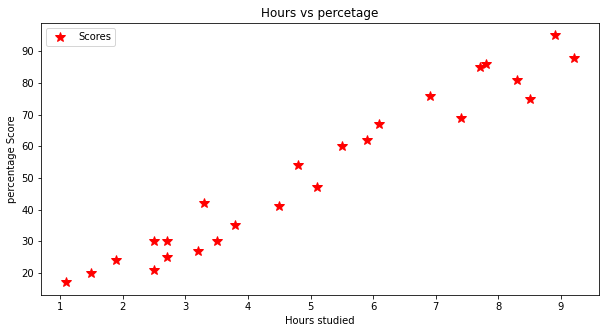

In [10]:
#scatter plot using matplotlib
plt.rcParams["figure.figsize"]=[10,5]
data.plot(x="Hours",y="Scores",style="*",color="red",markersize=10)
plt.title("Hours vs percetage")
plt.xlabel("Hours studied")
plt.ylabel("percentage Score")
plt.show()

In [11]:
#we can also use .corr to determine the corelation between the variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Step 3:-Data preparation

In [12]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
# using iloc function we will divide the data
x= data.iloc[:,:1].values
y= data.iloc[:,1:].values

In [14]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [16]:
# splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,
                          test_size=0.2, random_state=0)

# Step 4:-Training the algorithm

In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

# Step 5:-Visualizing the model

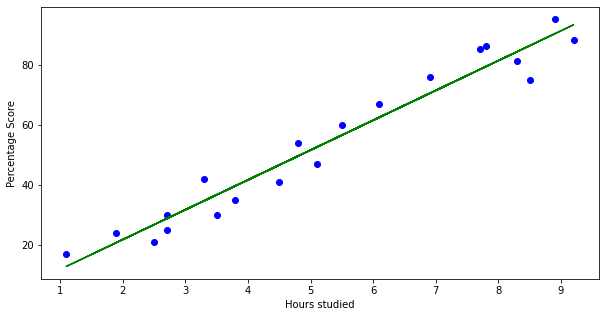

In [18]:
line = model.coef_*x + model.intercept_
# regression plot using seaborn
plt.rcParams["figure.figsize"]=[10,5]
plt.scatter(x_train,y_train,color="blue")
plt.plot(x,line, color="green")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.show()

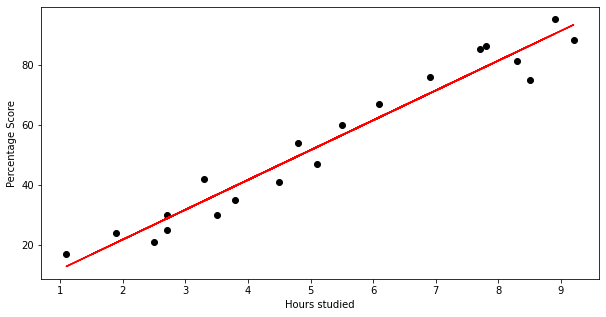

In [19]:
line = model.coef_*x + model.intercept_
# plotting for the training data
plt.rcParams["figure.figsize"]=[10,5]
plt.scatter(x_train,y_train,color="black")
plt.plot(x,line, color="red")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.show()

# Step 6:-Making predcitions

In [20]:
print(x_test)
y_pred = model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
#comparing Actual vs predicted

y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [22]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [23]:
#comparing Actual vs predicted
comp = pd.DataFrame({"Actual":[y_test],"predicted":[y_pred] })

In [24]:
comp

,Actual,predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [25]:
#Testing with your own data


hours=9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"houre is",own_pred[0])


The predicted score if a person studies for 9.25 houre is [93.69173249]


# Step 7:-Evaluating the model

In [26]:
from sklearn import metrics

print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


# THANK YOU